# News Popularity across Platforms

### Source: UCI Machine Learning Repository
   ### Weblink: [UCI Website](https://archive.ics.uci.edu/ml/datasets/Parkinson+Disease+Spiral+Drawings+Using+Digitized+Graphics+Tablet#)
    Nuno Moniz 
    LIAAD - INESC Tec; Sciences College, University of Porto 
    Email: nmmoniz@inesctec.pt 

    Luis Torgo 
    LIAAD - INESC Tec; Sciences College, University of Porto 
    Email: ltorgo@dcc.fc.up.pt
### Relevant Papers:
   #### Nuno Moniz and Luis Torgo (2018) [Multi-Source Social Feedback of Online News Feeds](https://arxiv.org/abs/1801.07055)

In [1]:
from viralnews.get_news import *
from viralnews.data_tools import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-paper')

import seaborn as sb
import numpy as np
import pandas as pd
import dask
import dask.dataframe as dd

from itertools import chain
from collections import Counter

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00432/Data/'

In [3]:
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/00432/Data/Facebook_Economy.csv"

In [4]:
fb_economy = pd.read_csv(file,index_col='IDLink')

In [5]:
fb_economy.tail()

,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
IDLink,,,,,,,,,,,,,,,,,,,,,
58440,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
58441,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
58444,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
58446,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,2,2,2,2,2,2,2,2,2,2
58447,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [6]:
top_10 = fb_economy.TS144.nlargest(10).index

**Investigating the lifespan of the ten most popular stories by TS144**

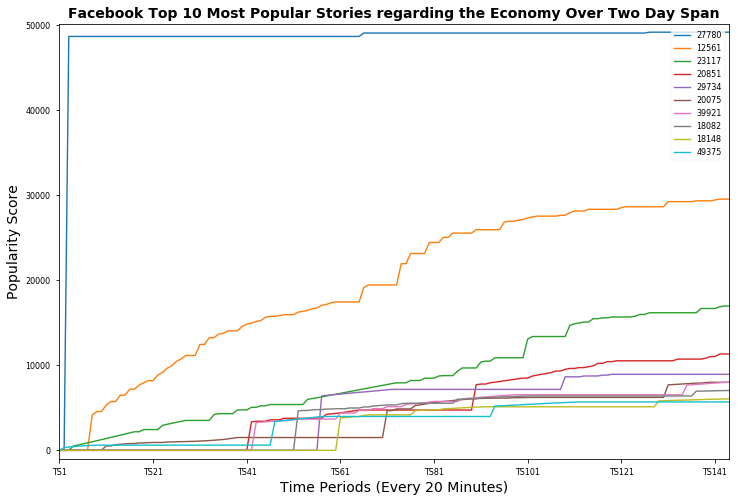

In [7]:
fb_economy.loc[top_10].T.plot(figsize=(12,8))
plt.legend(loc='upper right')
plt.title('Facebook Top 10 Most Popular Stories regarding the Economy Over Two Day Span',fontsize=14,fontweight='bold')
plt.xlabel('Time Periods (Every 20 Minutes)',fontsize=14)
plt.ylabel('Popularity Score',fontsize=14)
plt.margins(0.02)
plt.show()

**Using the chain method to collect the periodic top ten stories and unpack the list of lists into a single list of dicts**

In [8]:
top_10_periodically = list(chain.from_iterable([list(fb_economy[k].nlargest(10).index) for k in list(fb_economy.columns)]))

In [9]:
top_10_periodically[:10]

[47982, 46935, 45397, 2229, 7389, 43233, 43985, 48003, 51600, 2279]

**Converting dicts into tuples to make it easier for DataFrame construction using .from_records(data) method**

In [10]:
count_top_10_appearances = [(k, v) for k, v in dict(Counter(top_10_periodically)).items()]

In [11]:
count_top_10_appearances[:10]

[(47982, 25),
 (46935, 12),
 (45397, 5),
 (2229, 2),
 (7389, 2),
 (43233, 1),
 (43985, 1),
 (48003, 1),
 (51600, 1),
 (2279, 1)]

In [12]:
trending_df = pd.DataFrame.from_records(count_top_10_appearances,columns=['ID','Count']).set_index('ID')

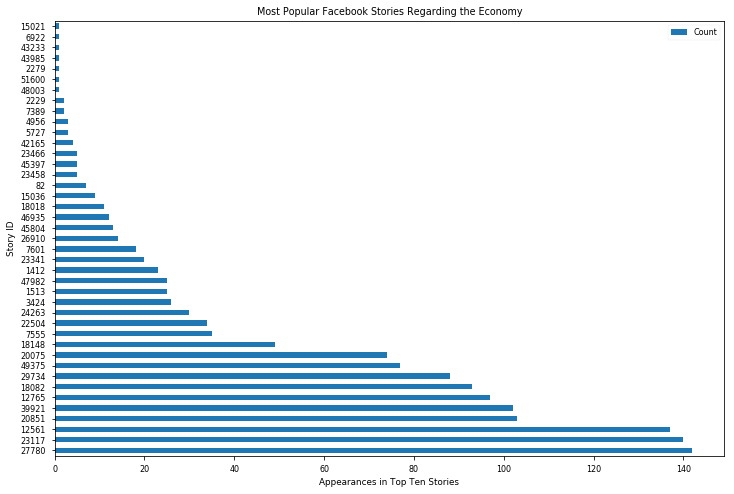

In [13]:
fig = trending_df.sort_values(by='Count',ascending=False).plot(kind='barh',figsize=(12,8))
plt.title('Most Popular Facebook Stories Regarding the Economy')
plt.ylabel('Story ID')
plt.xlabel('Appearances in Top Ten Stories')
plt.show()

### Creating Delayed Objects from .csv files to speed things up

In [14]:
url_list = url_find()
print(url_list)

['Facebook_Economy', 'Facebook_Microsoft', 'Facebook_Obama', 'Facebook_Palestine', 'GooglePlus_Economy', 'GooglePlus_Microsoft', 'GooglePlus_Obama', 'GooglePlus_Palestine', 'LinkedIn_Economy', 'LinkedIn_Microsoft', 'LinkedIn_Obama', 'LinkedIn_Palestine']


In [15]:
delayed = [dask.delayed(df_read)(u) for u in url_list]

In [16]:
delayed_df = dd.from_delayed(delayed)

In [17]:
platform_group = delayed_df.drop(['Platform','Topic'],axis=1).groupby('Platform_Topic')

In [18]:
platform_group.mean().head()

,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
Platform_Topic,,,,,,,,,,,,,,,,,,,,,
Facebook_Economy,-0.420710,0.019814,2.061080,2.586240,2.994988,3.285251,3.813085,4.345295,4.701751,5.244219,...,44.256750,44.341687,44.512597,44.618818,44.717221,44.804431,44.888466,45.117482,45.233995,45.335739
Facebook_Microsoft,-0.404349,0.050888,0.482867,1.030813,1.376073,1.671847,2.145972,2.444390,2.673574,3.135772,...,36.434623,36.501160,36.614646,36.713237,36.783606,36.843344,36.950785,36.988614,37.045599,37.081863
Facebook_Obama,2.773903,4.434833,6.643272,11.199371,13.373422,15.518157,19.446863,22.260448,24.857264,29.556061,...,287.680474,288.310642,288.945919,289.585304,290.350694,291.055673,294.480955,296.397594,298.233056,299.485212
Facebook_Palestine,-0.177442,0.148432,0.516977,2.323663,2.673735,3.123715,3.651359,4.105373,4.566671,5.092754,...,53.027579,53.192923,53.334721,53.448419,53.729804,53.875244,54.380513,54.653311,55.038116,55.248471
GooglePlus_Economy,-0.640419,-0.497687,-0.396867,-0.244700,-0.221265,-0.201397,-0.112069,-0.093471,-0.075690,-0.012912,...,1.709214,1.713962,1.719768,1.725211,1.729656,1.733104,1.737065,1.743143,1.746742,1.751247


Text(0.5,0,'Time Periods (Every 20 Minutes)')

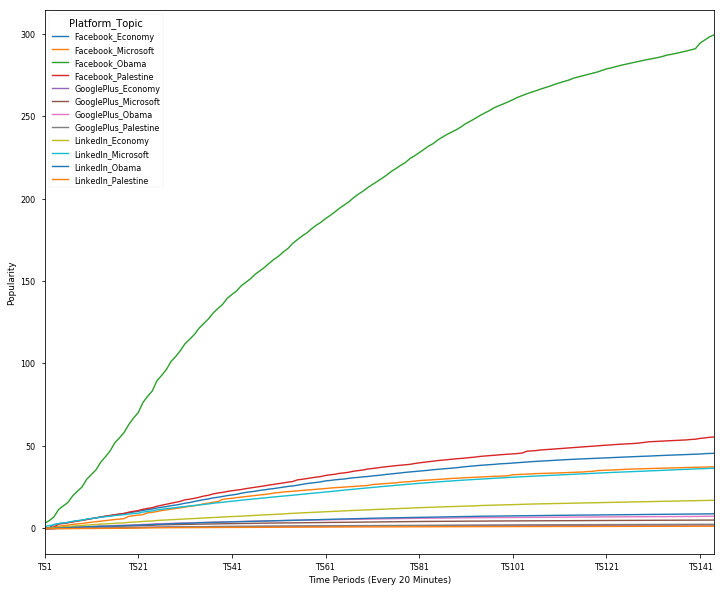

In [19]:
platform_group.mean().compute().T.plot(figsize=(12,10))
plt.ylabel('Popularity')
plt.xlabel('Time Periods (Every 20 Minutes)')

### Unsurprisingly, Facebook articles on Obama drew the most attention.

In [20]:
#for some reason, it is not letting me perform .nlargest() on the SeriesGroupBy object - Dask issue?
#Instead, I am using .apply() with a lambda nlargest function

top_10_by_platform_topic = pd.DataFrame(platform_group.TS144.apply(lambda x: x.nlargest(10)).compute())

C:\Users\mgavin\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  after removing the cwd from sys.path.


In [21]:
top_10_df = pd.melt(top_10_by_platform_topic.reset_index(),id_vars=['IDLink','Platform_Topic'],value_vars=['TS144'],value_name='Popularity after 2 Days')
top_10_df.drop('variable',axis=1,inplace=True)

In [22]:
top_10_df.set_index('IDLink',drop=True,inplace=True)

In [23]:
top_10_df.index = top_10_df.index.astype('object')

In [24]:
top_10_df.head(20)

,Platform_Topic,Popularity after 2 Days
IDLink,,
72143,Facebook_Obama,40836
76901,Facebook_Obama,32385
72045,Facebook_Obama,30489
62638,Facebook_Obama,24594
67508,Facebook_Obama,22518
65424,Facebook_Obama,19136
67141,Facebook_Obama,17170
90713,Facebook_Obama,16598
94081,Facebook_Obama,15692


In [25]:
top_articles_platform_topic = list(top_10_df.index)

In [26]:
top_articles_platform_topic[:10]

[72143, 76901, 72045, 62638, 67508, 65424, 67141, 90713, 94081, 90631]

In [27]:
top_articles = delayed_df.compute().loc[top_articles_platform_topic]

In [28]:
multiple_appearances = top_articles.loc[top_articles.index.value_counts() >5]

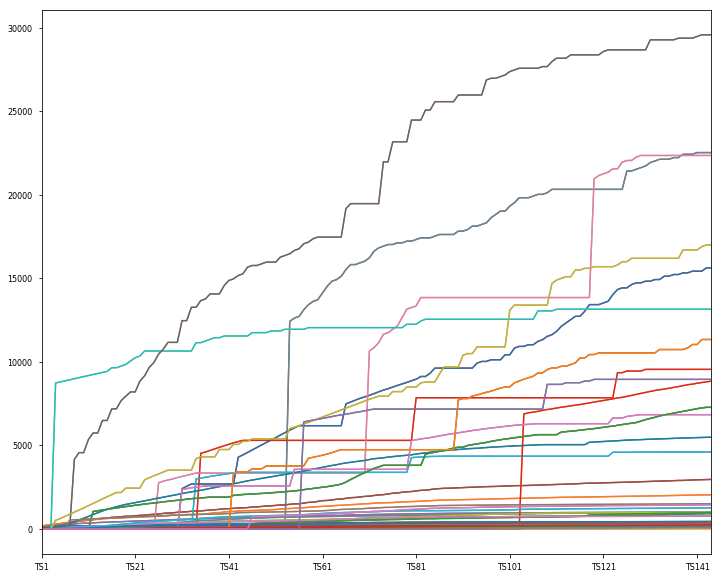

In [29]:
multiple_appearances.drop(['Platform','Topic','Platform_Topic'],axis=1).T.plot(legend=False,figsize=(12,10))

In [30]:
multiple_appearances[multiple_appearances.Platform == 'Facebook'].Topic.value_counts()

Palestine    11
Economy       8
Microsoft     6
Obama         4
Name: Topic, dtype: int64

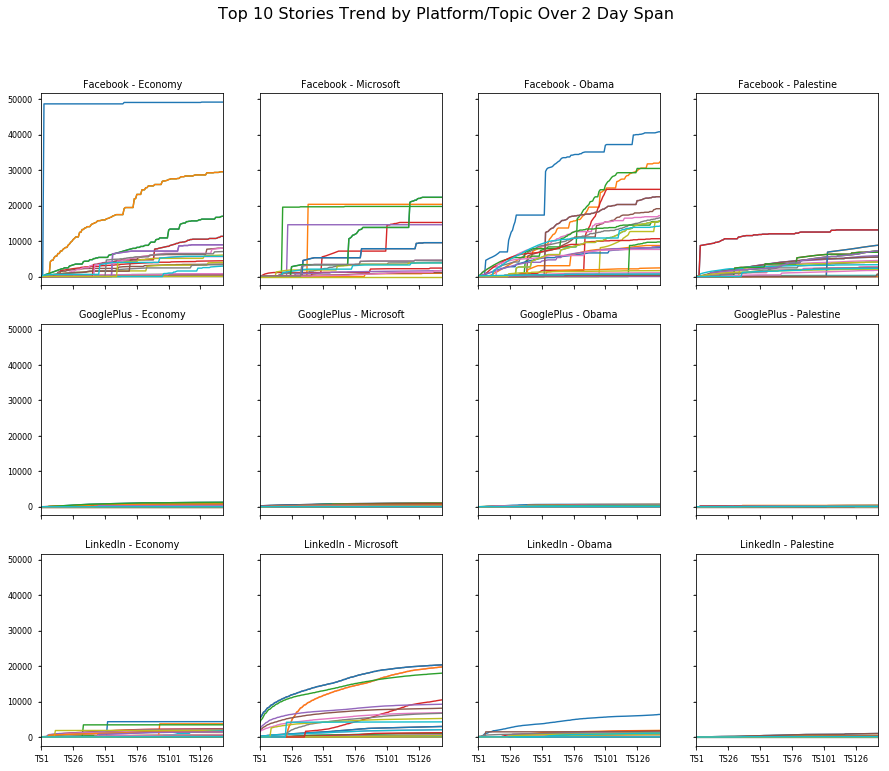

In [31]:
fig, charts = plt.subplots(nrows=3,ncols=4,figsize=(15,12),sharex=True,sharey=True)

for platform_topic, chart in zip(url_list,charts.flatten()):
    df = top_articles.drop(['Platform','Topic'],axis=1)
    platform, topic = platform_topic.split('_')
    df = df[df['Platform_Topic'] == platform_topic]
    df.drop('Platform_Topic',axis=1,inplace=True)
    df.T.plot(ax=chart,legend=False)
    chart.set_title('{} - {}'.format(platform,topic))

plt.suptitle('Top 10 Stories Trend by Platform/Topic Over 2 Day Span',fontsize=16)
plt.figure(figsize=(12,10))
plt.show()

## Observations thus far: ##

    - Facebook appears to have been the preferred platform for sharing new stories
    - GooglePlus was a near non-factor in news popularity metrics
    - LinkedIn cares a lot about Microsoft, due to Microsoft's acquisition of the site (June 2016)

In [32]:
news_final = dd.from_delayed(dask.delayed(pd.read_csv)(url+'News_Final.csv'))
news_final = news_final.persist()

In [33]:
news_final.IDLink = news_final.IDLink.astype('int64').astype('object')
news_final = news_final[news_final.Source != " "]
news_final.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


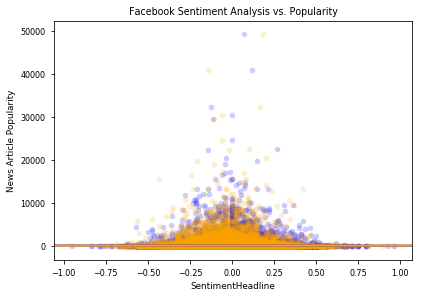

In [34]:
sb.regplot(x='SentimentTitle',y='Facebook',data=news_final.compute(),color='blue',scatter_kws={'alpha':0.2})
sb.regplot(x='SentimentHeadline',y='Facebook',data=news_final.compute(),color='orange',scatter_kws={'alpha':0.2})
plt.ylabel('News Article Popularity')
plt.title('Facebook Sentiment Analysis vs. Popularity')
plt.show()

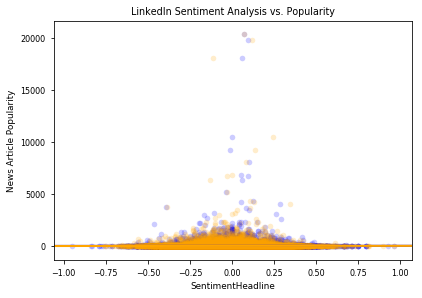

In [35]:
sb.regplot(x='SentimentTitle',y='LinkedIn',data=news_final.compute(),color='blue',scatter_kws={'alpha':0.2})
sb.regplot(x='SentimentHeadline',y='LinkedIn',data=news_final.compute(),color='orange',scatter_kws={'alpha':0.2})
plt.ylabel('News Article Popularity')
plt.title('LinkedIn Sentiment Analysis vs. Popularity')
plt.show()

### Perhaps surprisingly, the most popular articles appear to have a neutral sentiment

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split

In [37]:
news_final = pd.DataFrame(news_final.compute())

In [38]:
facebook_df = news_final[news_final['Facebook'] > 0].drop(['GooglePlus','LinkedIn'],axis=1)

In [39]:
linreg = LinearRegression()
polyfit = PolynomialFeatures()

In [40]:
X_fb = facebook_df[['SentimentTitle','SentimentHeadline']].values
y_fb = facebook_df['Facebook'].values

In [41]:
X_fb_poly = polyfit.fit_transform(X_fb)

In [42]:
r2_scores = cross_val_score(linreg,X_fb_poly,y_fb,cv=5)

In [43]:
r2_scores

array([-0.00474863, -0.0012204 , -0.00060224, -0.01056862, -0.00128004])

### No linear relationship between sentiment score and popularity, which underlying relationship would fit better?

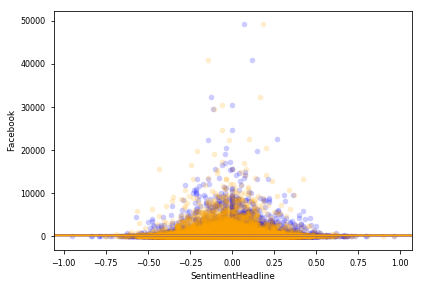

In [44]:
sb.regplot(x='SentimentTitle',y='Facebook',data=facebook_df,color='blue',scatter_kws={'alpha':0.2})
sb.regplot(x='SentimentHeadline',y='Facebook',data=facebook_df,color='orange',scatter_kws={'alpha':0.2})
plt.show()

In [45]:
news_with_max = add_sent_max(news_final)

In [46]:
for n in ['Facebook','LinkedIn','GooglePlus']:
    news_with_max[n] = news_with_max[n].replace(-1,np.median(news_with_max[n]))


In [47]:
news_topic_by_source = pd.get_dummies(news_with_max,columns=['Topic'],prefix='top',prefix_sep='_')
news_topic_by_source.head()

,IDLink,Title,Headline,Source,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,SentimentMax,top_economy,top_microsoft,top_obama,top_palestine
0,99248,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,2002-04-02 00:00:00,0.000000,-0.053300,5,0,0,-0.053300,0,0,1,0
1,10423,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,2008-09-20 00:00:00,0.208333,-0.156386,5,0,0,0.208333,1,0,0,0
2,18828,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,2012-01-28 00:00:00,-0.425210,0.139754,5,0,0,-0.425210,1,0,0,0
3,27788,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,2015-03-01 00:06:00,0.000000,0.026064,5,0,0,0.026064,1,0,0,0
4,27789,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,2015-03-01 00:11:00,0.000000,0.141084,5,0,0,0.141084,1,0,0,0


In [48]:
news_topic_by_source.Source.value_counts()[:500].sum() / len(news_topic_by_source)

0.7284719166246284

In [49]:
prolific_sources = list(news_topic_by_source.Source.value_counts()[:500].index)

In [50]:
prolific_sources[:10]

['Bloomberg',
 'Reuters',
 'ABC News',
 'New York Times',
 'The Guardian',
 'Business Insider',
 'Economic Times',
 'Forbes',
 'Washington Post',
 'CNN']

In [51]:
 freq_topic_by_source = news_topic_by_source.loc[:,['Source',
                                           'top_economy',
                                           'top_microsoft',
                                           'top_obama',
                                           'top_palestine']].groupby('Source').mean()

In [52]:
trimmed_freq_topic_by_source = freq_topic_by_source.loc[prolific_sources,:]
trimmed_freq_topic_by_source.top_economy.nlargest(25)

Source
FXStreet                                   1.000000
ForexLive                                  1.000000
China Daily                                1.000000
RenewEconomy                               1.000000
Hellenic Shipping News Worldwide           1.000000
Scotsman                                   1.000000
This is Money                              1.000000
Nikkei Asian Review                        0.980132
Calgary Herald                             0.977273
Philippine Star                            0.974359
TASS                                       0.964467
BDlive                                     0.963415
Kathimerini                                0.944444
Asia Times                                 0.937500
The Nation Newspaper                       0.930233
South China Morning Post                   0.927273
euronews                                   0.924812
Belfast Telegraph                          0.923913
South China Morning Post (subscription)    0.922330
Bangk

In [53]:
trimmed_freq_topic_by_source.head()

,top_economy,top_microsoft,top_obama,top_palestine
Source,,,,
Bloomberg,0.781178,0.060624,0.155312,0.002887
Reuters,0.677517,0.042392,0.274035,0.006056
ABC News,0.193989,0.034608,0.755920,0.015483
New York Times,0.288306,0.065524,0.623992,0.022177
The Guardian,0.438371,0.062165,0.437299,0.062165


In [54]:
source_topic = news_with_max.loc[:,['Source','Topic','SentimentMax']].groupby(['Source','Topic']).mean()
source_topic.head(16)

SentimentMax
Source          Topic                  
+972 Magazine   palestine     -0.083175
/FILM           economy        0.044583
10News          economy       -0.062272
                obama         -0.213201
10TV            economy       -0.175774
11alive.com     obama         -0.006580
                palestine      0.132583
12 News Phoenix microsoft     -0.138675
                obama         -0.029020
12NewsNow.Com   economy       -0.215187
                obama         -0.032364
12news.com      economy       -0.033817
                microsoft     -0.340965
                obama          0.054696
1340 WJOL       palestine      0.020458
13WMAZ          microsoft      0.023778

## Unstacking grouped object and filtering to just sources in top 500 of stories written

In [55]:
source_topic_sentiment = source_topic.loc[prolific_sources,:].reset_index()

In [56]:
source_topic_sentiment.head(16)

,Source,Topic,SentimentMax
0,24/7 Wall St.,economy,-0.082386
1,24/7 Wall St.,microsoft,-0.039277
2,AAP via Yahoo! New Zealand Finance,economy,0.030744
3,AAP via Yahoo! New Zealand Finance,microsoft,0.003863
4,AAP via Yahoo! New Zealand Finance,obama,0.057844
5,AAP via Yahoo!7 Finance,economy,0.007852
6,AAP via Yahoo!7 Finance,microsoft,0.014709
7,AAP via Yahoo!7 Finance,obama,0.060212
8,ABC News,economy,-0.027956
9,ABC News,microsoft,-0.060376


In [57]:
len(source_topic_sentiment.Source.value_counts() > 3)

500

In [58]:
source_topic_sentiment = pd.pivot_table(source_topic_sentiment,values='SentimentMax',columns=['Topic'],index='Source')

In [59]:
source_topic_sentiment.head(10)

Topic,economy,microsoft,obama,palestine
Source,,,,
24/7 Wall St.,-0.082386,-0.039277,NaN,NaN
AAP via Yahoo! New Zealand Finance,0.030744,0.003863,0.057844,NaN
AAP via Yahoo!7 Finance,0.007852,0.014709,0.060212,NaN
ABC News,-0.027956,-0.060376,0.005307,-0.041527
ABC Online,-0.047090,-0.050540,-0.046214,0.003822
AFP News via Yahoo! Singapore News,-0.161355,0.016592,-0.097089,-0.066099
AFP Relax News via Yahoo! News,-0.081599,-0.048354,0.014804,NaN
AFP via Yahoo UK & Ireland News,-0.095892,0.020623,-0.085208,NaN
AFP via Yahoo! Finance,-0.127815,0.026167,-0.066716,-0.200172


Let's now join the two tables to get the frequency of topic covered as well as the sentiment for that topic, by each source

In [60]:
news_topics_sentiment_by_source = trimmed_freq_topic_by_source.join(source_topic_sentiment)
news_topics_sentiment_by_source.head()

,top_economy,top_microsoft,top_obama,top_palestine,economy,microsoft,obama,palestine
Source,,,,,,,,
Bloomberg,0.781178,0.060624,0.155312,0.002887,-0.032253,-0.018292,-0.042087,0.018100
Reuters,0.677517,0.042392,0.274035,0.006056,-0.056785,-0.011063,-0.031831,-0.042495
ABC News,0.193989,0.034608,0.755920,0.015483,-0.027956,-0.060376,0.005307,-0.041527
New York Times,0.288306,0.065524,0.623992,0.022177,-0.046023,-0.024159,-0.007663,-0.112957
The Guardian,0.438371,0.062165,0.437299,0.062165,-0.049095,-0.057673,-0.032411,-0.063856


Is there a correlation between how frequently a source covers a topic and the sentiment they have towards that topic?

In [61]:
top_25_obama = news_topics_sentiment_by_source.top_obama.nlargest(25)
top_25_economy = news_topics_sentiment_by_source.top_economy.nlargest(25)
top_25_palestine = news_topics_sentiment_by_source.top_palestine.nlargest(25)
top_25_microsoft = news_topics_sentiment_by_source.top_microsoft.nlargest(25)

In [62]:
top_25_obama_sentiment = sum(news_topics_sentiment_by_source.loc[top_25_obama.index,'obama'] >=0) / 25
top_25_economy_sentiment = sum(news_topics_sentiment_by_source.loc[top_25_economy.index,'economy'] >=0) / 25
top_25_palestine_sentiment = sum(news_topics_sentiment_by_source.loc[top_25_palestine.index,'palestine'] >=0) / 25
top_25_microsoft_sentiment = sum(news_topics_sentiment_by_source.loc[top_25_microsoft.index,'microsoft'] >=0) / 25

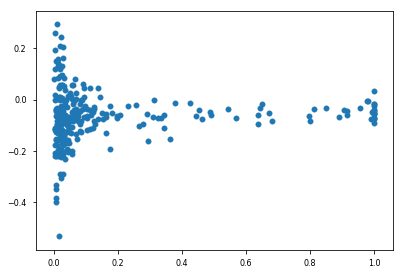

In [63]:
plt.scatter(x=news_topics_sentiment_by_source['top_palestine'],y=news_topics_sentiment_by_source['palestine'])
plt.show()

### Time to test whether there is a correlation between Obama sentiment and economy sentiment

In [64]:
obama_economy = source_topic_sentiment.iloc[:,[0,2]]
obama_economy.dropna(inplace=True)
obama_economy.head()

Topic,economy,obama
Source,,
AAP via Yahoo! New Zealand Finance,0.030744,0.057844
AAP via Yahoo!7 Finance,0.007852,0.060212
ABC News,-0.027956,0.005307
ABC Online,-0.047090,-0.046214
AFP News via Yahoo! Singapore News,-0.161355,-0.097089


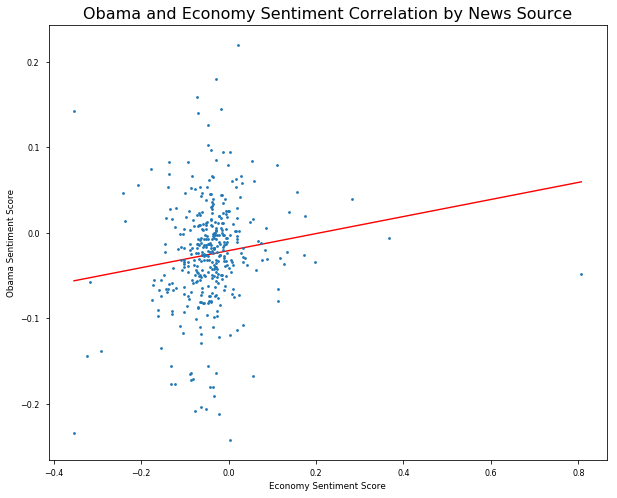

In [65]:
economy = obama_economy['economy'].values
obama = obama_economy['obama'].values

quad = np.polyfit(economy, obama,deg=1)

x = np.linspace(min(economy),max(economy),20)
y = np.polyval(quad,x)

plt.figure(figsize=(10,8))
plt.plot(x,y,color='red')
plt.plot(economy,obama,marker='.',linestyle='none')
plt.xlabel('Economy Sentiment Score')
plt.ylabel('Obama Sentiment Score')
plt.title('Obama and Economy Sentiment Correlation by News Source',fontsize=16)
plt.show()

Very weak positive relationship among News Sources between economy and Obama sentimentality scores

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000D302578978>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000D301A54198>], dtype=object)

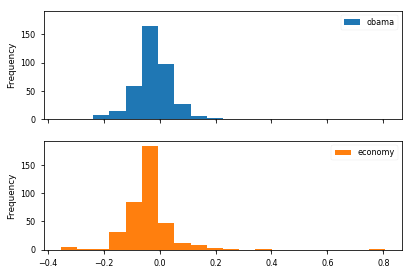

In [66]:
obama_economy.loc[:,['obama','economy']].plot(subplots=True,kind='hist',sharex=True,sharey=True,bins=20)

### Time Series Analyses ###

#### Overall News Popularity by Platform ####

In [67]:
news_timeline = news_final.set_index('PublishDate')

In [68]:
news_timeline.index = pd.DatetimeIndex(news_timeline.index)

In [69]:
news_timeline.IDLink = news_timeline.IDLink.astype('int').astype('object')

#### Filtering the date here to get a daily resampling and there is a large gap from beginning of 2015 until October/November

In [70]:
news_timeline = news_timeline.loc['2015-11-12':,:]

In [71]:
news_timeline = news_timeline.resample('D').mean()

In [72]:
news_timeline_trimmed = trendify_mean(news_timeline,normalize=True)
news_timeline_trimmed.head(10)

,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,SentimentMax,norm_trend_SentimentTitle,norm_trend_SentimentHeadline,norm_trend_Facebook,norm_trend_GooglePlus,norm_trend_LinkedIn,norm_trend_SentimentMax
PublishDate,,,,,,,,,,,,
2015-11-12,-0.011763,-0.032835,51.306502,4.216718,12.770898,-0.034042,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-13,-0.016437,-0.032054,33.587248,2.778523,12.865772,-0.038645,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-14,-0.013281,-0.053744,8.704082,1.693878,4.183673,-0.074068,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-15,-0.007915,-0.055842,49.397849,6.526882,7.037634,-0.056831,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-16,0.001005,-0.037864,28.915294,4.087059,20.395294,-0.034420,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-17,0.001770,-0.023542,24.756303,2.803922,27.226891,-0.017360,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-18,-0.000355,-0.032650,251.027027,6.132678,12.660934,-0.029374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-11-19,-0.009289,-0.033451,287.073333,6.244444,15.586667,-0.031771,-5.266402,0.229340,52.662459,7.180420,2.898638,-0.797540
2015-11-20,0.000054,-0.022598,282.293750,6.237500,8.977083,-0.023359,-40.370766,-3.292010,108.215210,19.429068,-1.104496,-6.165713


In [73]:
news_platforms = ['norm_trend_Facebook','norm_trend_GooglePlus','norm_trend_LinkedIn']

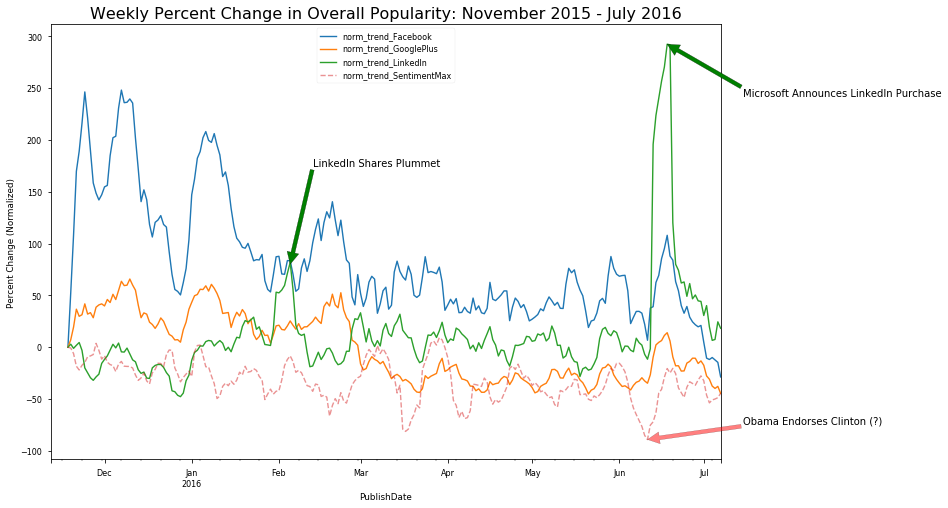

In [74]:
news_timeline_trimmed.loc['2015-11-18':,news_platforms].plot(figsize=(12,8))

news_timeline_trimmed['norm_trend_SentimentMax'].plot(linestyle='--',alpha=.5,legend=True)

_ = plt.annotate('Microsoft Announces LinkedIn Purchase',
                xy=('2016-06-18',news_timeline_trimmed['norm_trend_LinkedIn'].max()),
             xytext=('2016-07-15',news_timeline_trimmed['norm_trend_LinkedIn'].max()-50), 
            arrowprops={'facecolor':'green'})

_ = plt.annotate('Obama Endorses Clinton (?)',
                 xy=('2016-06-11',news_timeline_trimmed['norm_trend_SentimentMax'].min()),
                 xytext=('2016-07-15',news_timeline_trimmed['norm_trend_SentimentMax'].min()+15),
                arrowprops={'facecolor':'red','alpha':.5})

_ = plt.annotate('LinkedIn Shares Plummet',
                xy=('2016-02-05',80),
             xytext=('2016-02-13',175), 
            arrowprops={'facecolor':'green'})

plt.ylabel('Percent Change (Normalized)')
plt.title('Weekly Percent Change in Overall Popularity: November 2015 - July 2016',fontsize=16)

plt.legend(loc='upper center')

plt.show()

### Some conclusions

    1. After some research, there aren't very notable events that correspond with these peaks, except for the Microsoft/ 
    LinkedIn acqusition and possibly an early June Obama endorsement of Clinton. 
    2. There appears to be a correlation between GoogleNews and Facebook articles as the peaks line up quite nicely

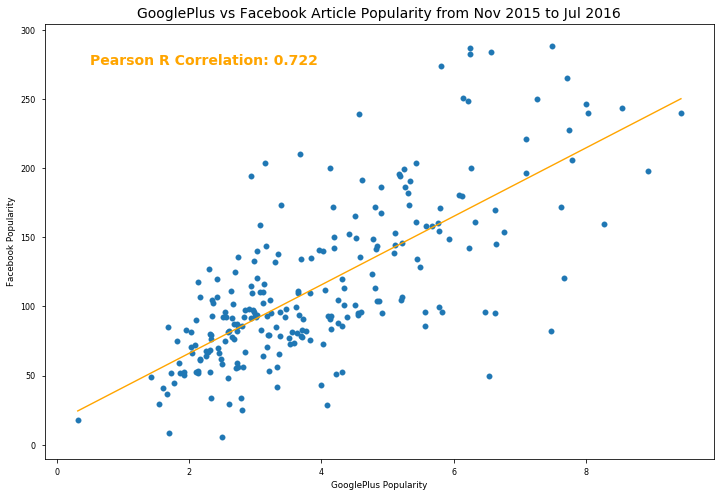

In [75]:
gplus = news_timeline['GooglePlus'].values
fbook = news_timeline['Facebook'].values

gplus_fbook_correlation = np.corrcoef(gplus,fbook)[0,1]

quad = np.polyfit(gplus, fbook,deg=1)

plt.figure(figsize=(12,8))

x = np.linspace(min(gplus),max(gplus),20)
y = np.polyval(quad,x)

plt.plot(x,y,color='orange')

plt.scatter(x=news_timeline['GooglePlus'],y=news_timeline['Facebook'])
plt.title('GooglePlus vs Facebook Article Popularity from Nov 2015 to Jul 2016',fontsize=14)
plt.text(.5,275,'Pearson R Correlation: {}'.format(round(gplus_fbook_correlation,3)),color='orange',fontsize=14,fontweight='bold')
plt.xlabel('GooglePlus Popularity')
plt.ylabel('Facebook Popularity')
plt.show()

#### Definitely a noticeable positive correlation between Facebook and GooglePlus article popularity